Table of Content:
    
    - Importing required libraries
    - Loading the dataset
    - Understanding the dataset
    - Top 10 job titles in 2023
    - Experience levels
    - Employment types
    - Salaries by job titles
    - Salaries by employment types
    - Salaries by work years
    - Remote jobs locations
    - Conclusion


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

!pip install country_converter -q
import country_converter as coco

## Loading the dataset

In [2]:
data = pd.read_csv('ds_salaries.csv')

In [3]:
data.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

## Understandin the dataset

In [4]:
## Checking the rows and columns in our dataset
print('Number of Rows and Columns in dataset:', data.shape)

Number of Rows and Columns in dataset: (3755, 11)


In [5]:
## checking the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
## Checking the null values in the dataset
print('Number of null values in the dataset:', data.isnull().sum().sum())

Number of null values in the dataset: 0


In [7]:
## Checking the uniques values in the dataset
print('Uniques values in the dataset:\n\n', data.nunique())

Uniques values in the dataset:

 work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


## Top 10 Job Title in 2023

[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22')]

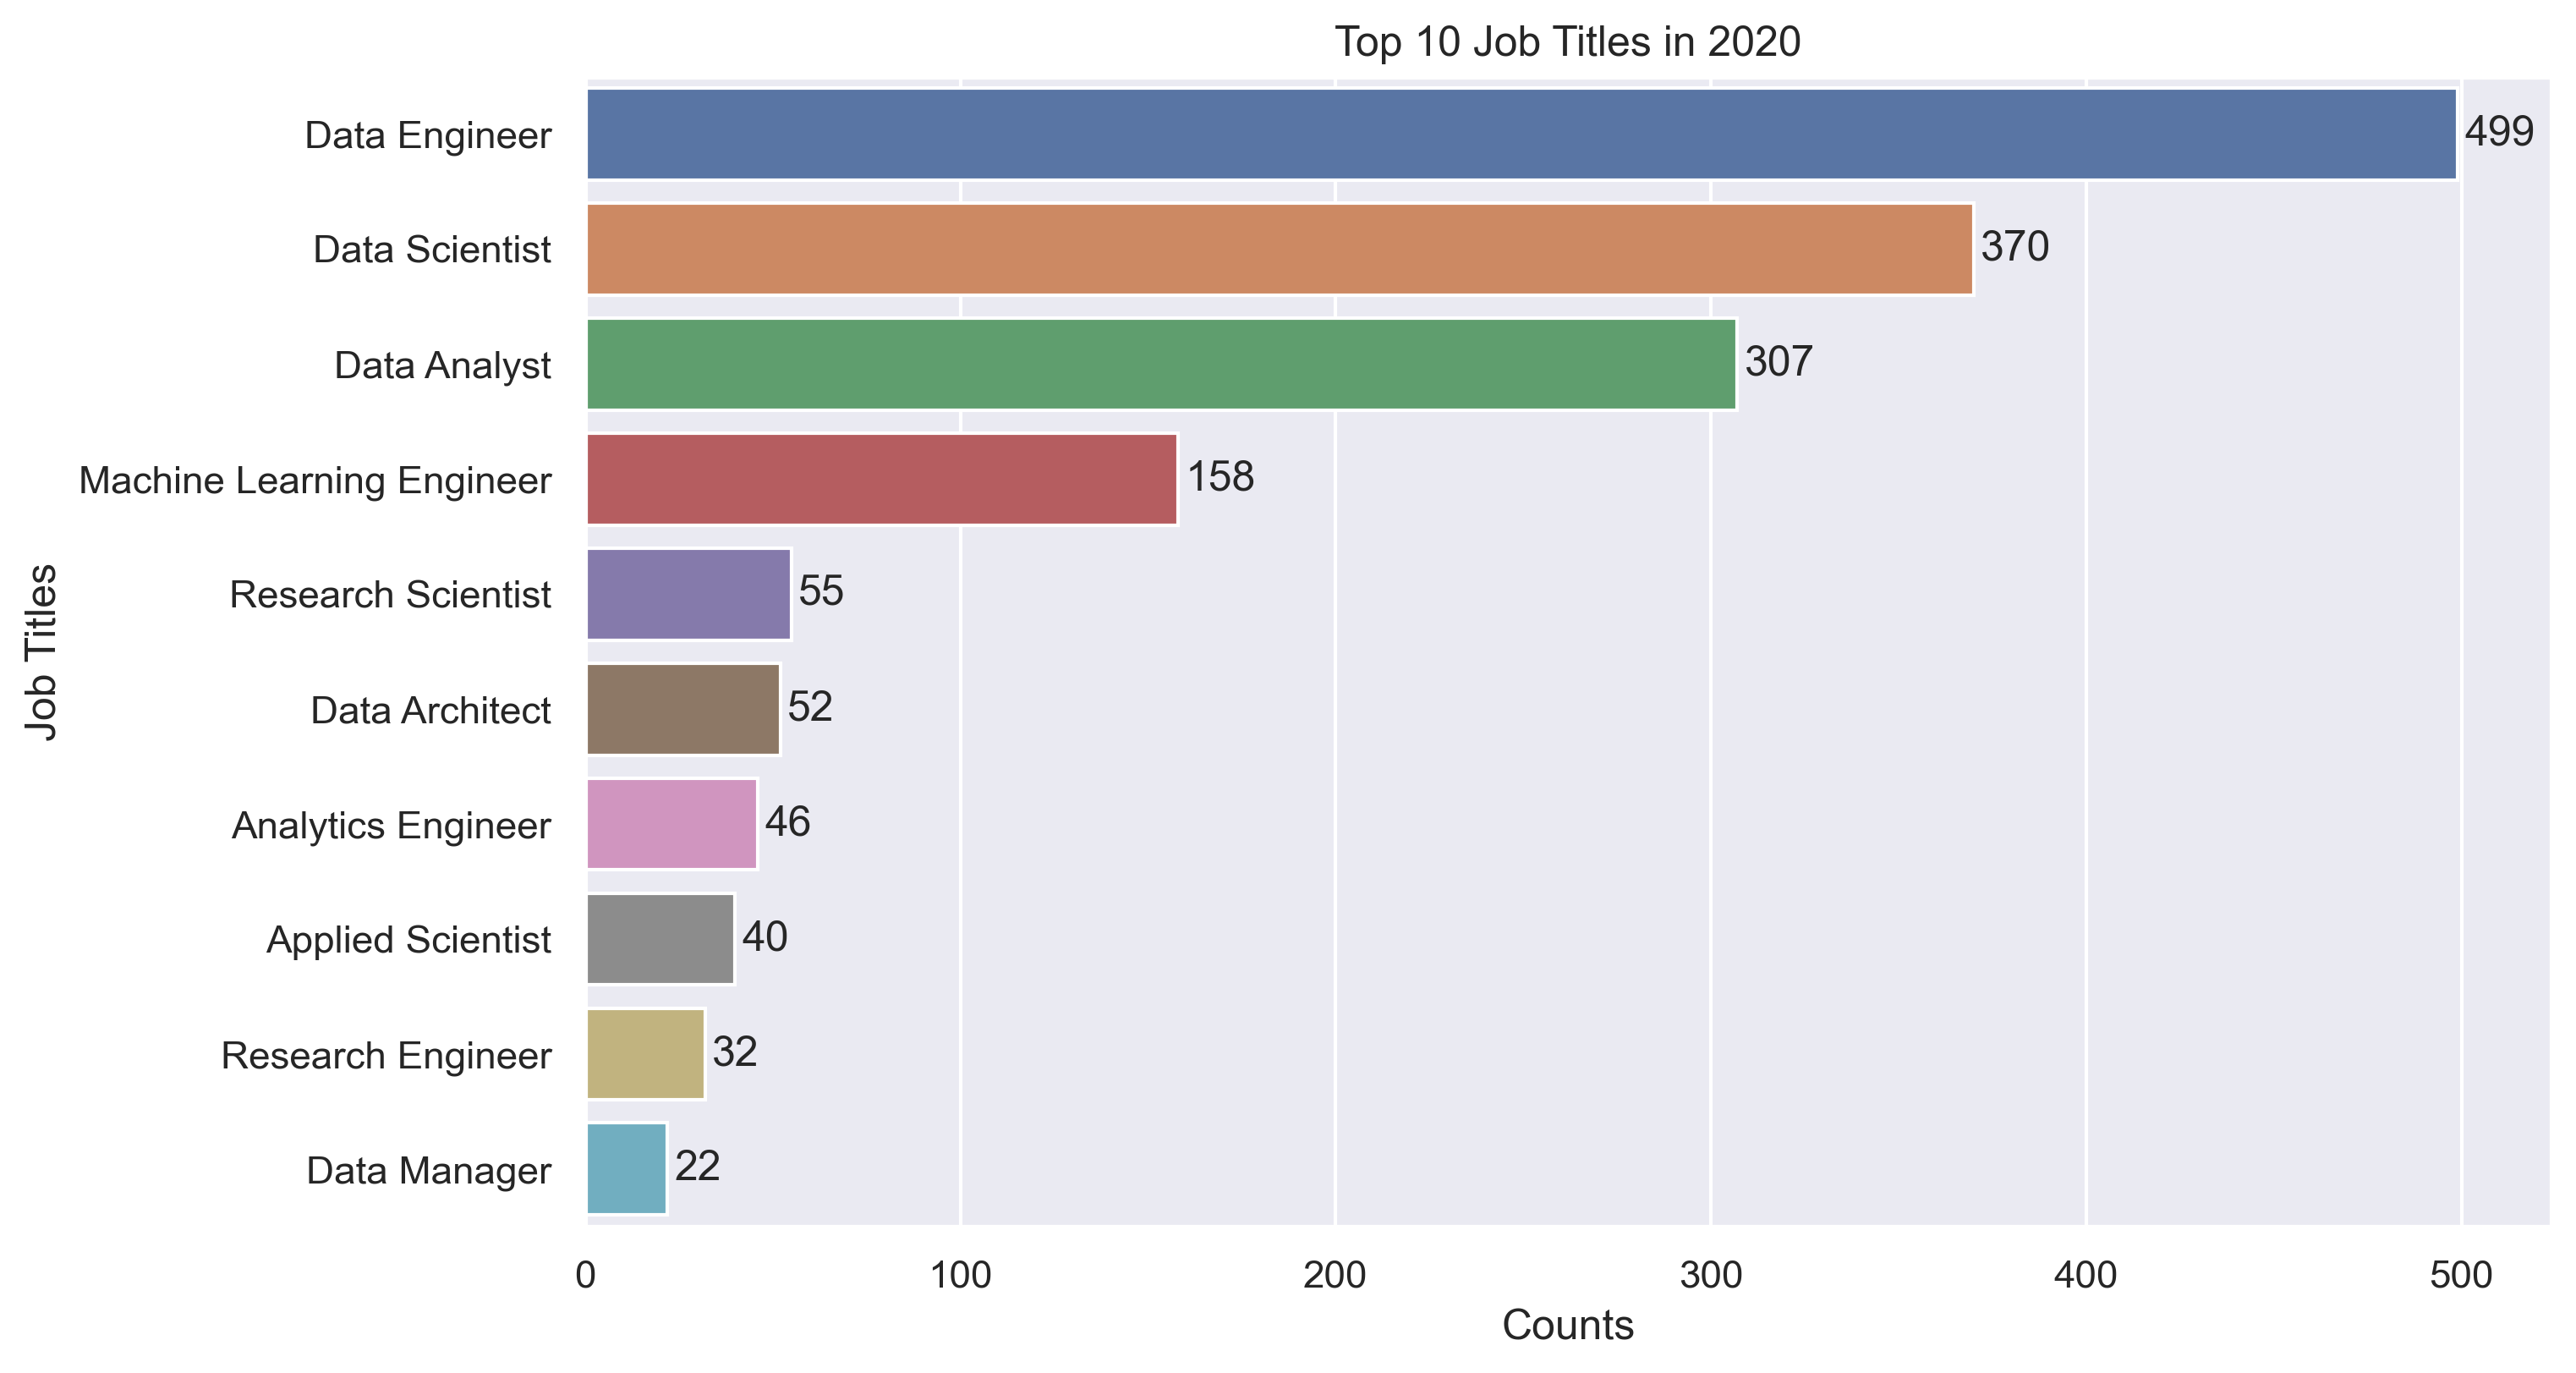

In [8]:
jobs = data[data['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = jobs.job_title)
ax.set(ylabel='Job Titles', xlabel='Counts', title='Top 10 Job Titles in 2020')
ax.bar_label(ax.containers[0], padding = 2)




As we can see, there are the most data engineers, followed by data scientists.


## Experiance Level

In [9]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)



As we can see, there are 4 unique values which are SE(Senior level/expert) , MI(medium level/intermediate) , EN (Entry level) and EX(Executive level). Lets rename these values with the rename method.


In [10]:
data['experience_level'] = data['experience_level'].replace('EN', 'Entry-Level/Junior')
data['experience_level'] = data['experience_level'].replace('MI', 'Medium-Level/Intermediate')
data['experience_level'] = data['experience_level'].replace('SE', 'Senior-Level/Expert')
data['experience_level'] = data['experience_level'].replace('EX', 'Executive Level')

Let's Draw a bar plot of experiance level

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

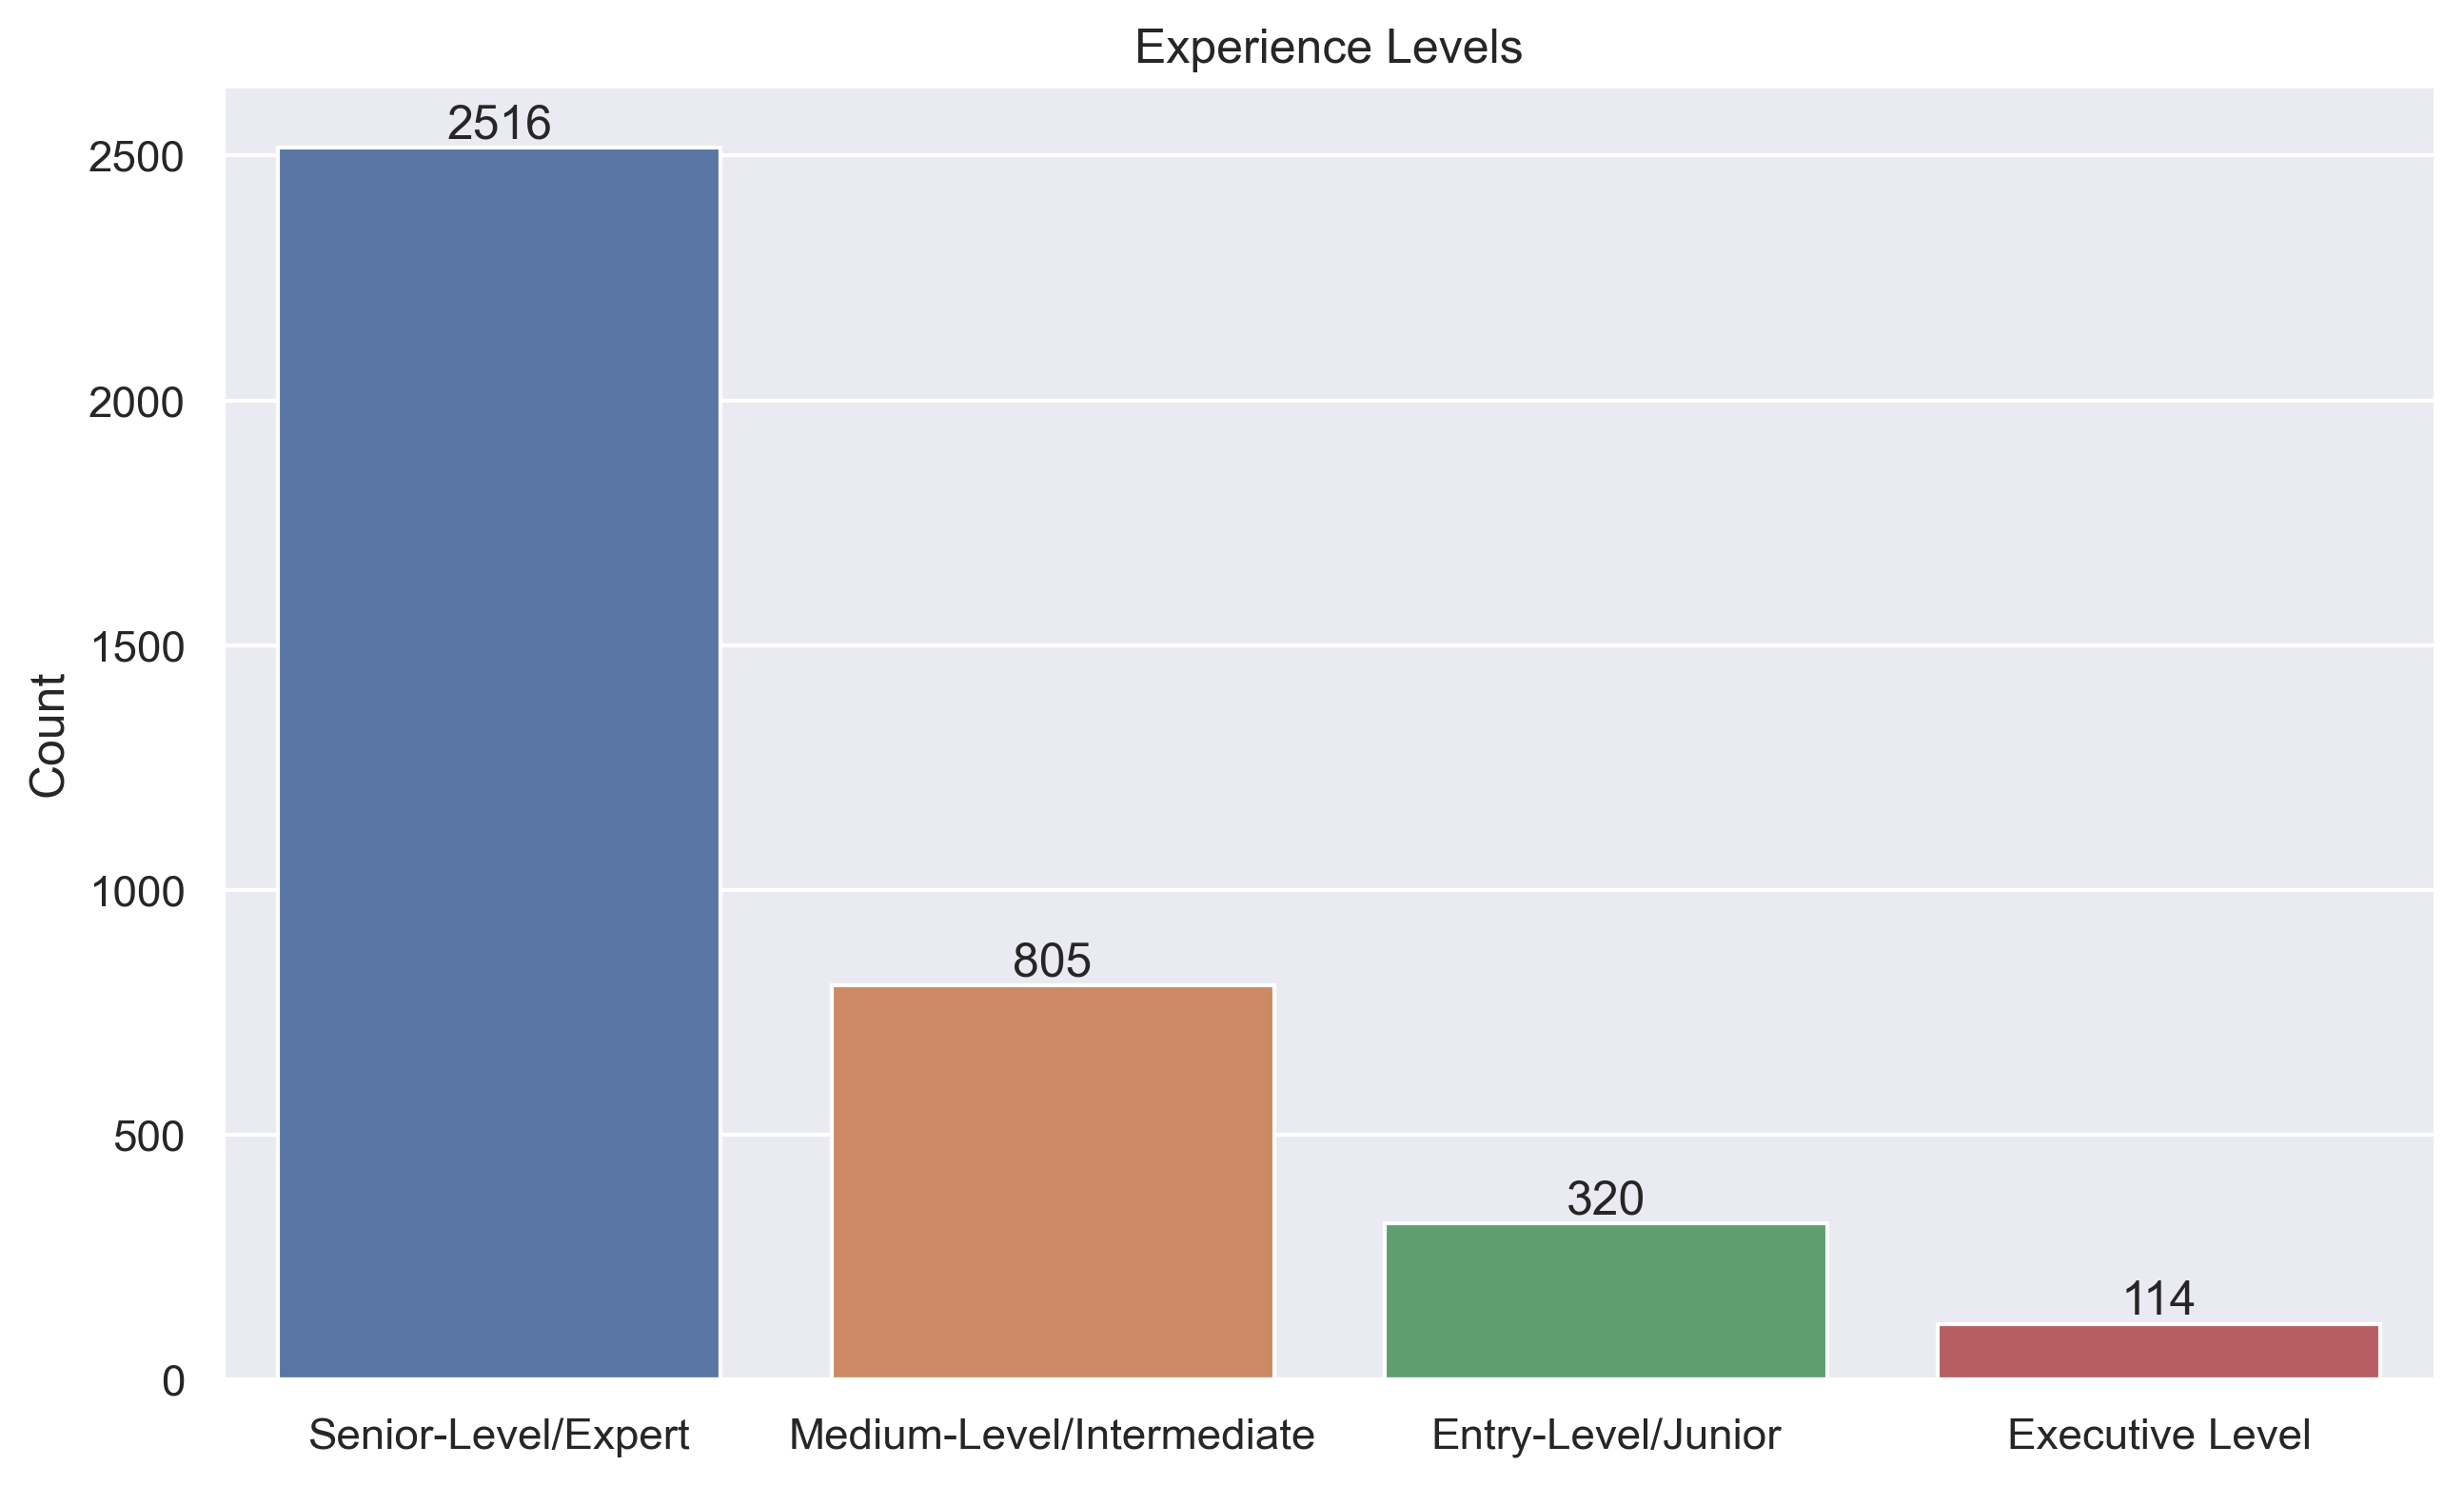

In [11]:
fig, ax = plt.subplots()
ax = sns.countplot(ax = ax, data = data, x = data.experience_level)
ax.set(xlabel = '', ylabel= 'Count', title='Experience Levels')
ax.bar_label(ax.containers[0])




As you we can see, the senior-level positions have the highest count, followed by mid-level and junior positions. There are fewer director-level positions compared to other levels.


## Employement Type



Now, let's look at the unique values in the employment_type column.


In [12]:
data['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

As you can see, there are 4 unique values which are FT(Full-Time), PT(Part-Time), CT(Contract) and FL(Freelance). Lets rename these values with the rename method.

In [13]:
data['employment_type'] = data['employment_type'].replace('FT', 'Full-Time')
data['employment_type'] = data['employment_type'].replace('CT', 'Contract')
data['employment_type'] = data['employment_type'].replace('PT', 'Part-Time')
data['employment_type'] = data['employment_type'].replace('FL', 'Freelace')


[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, ''), Text(0, 0, '')]

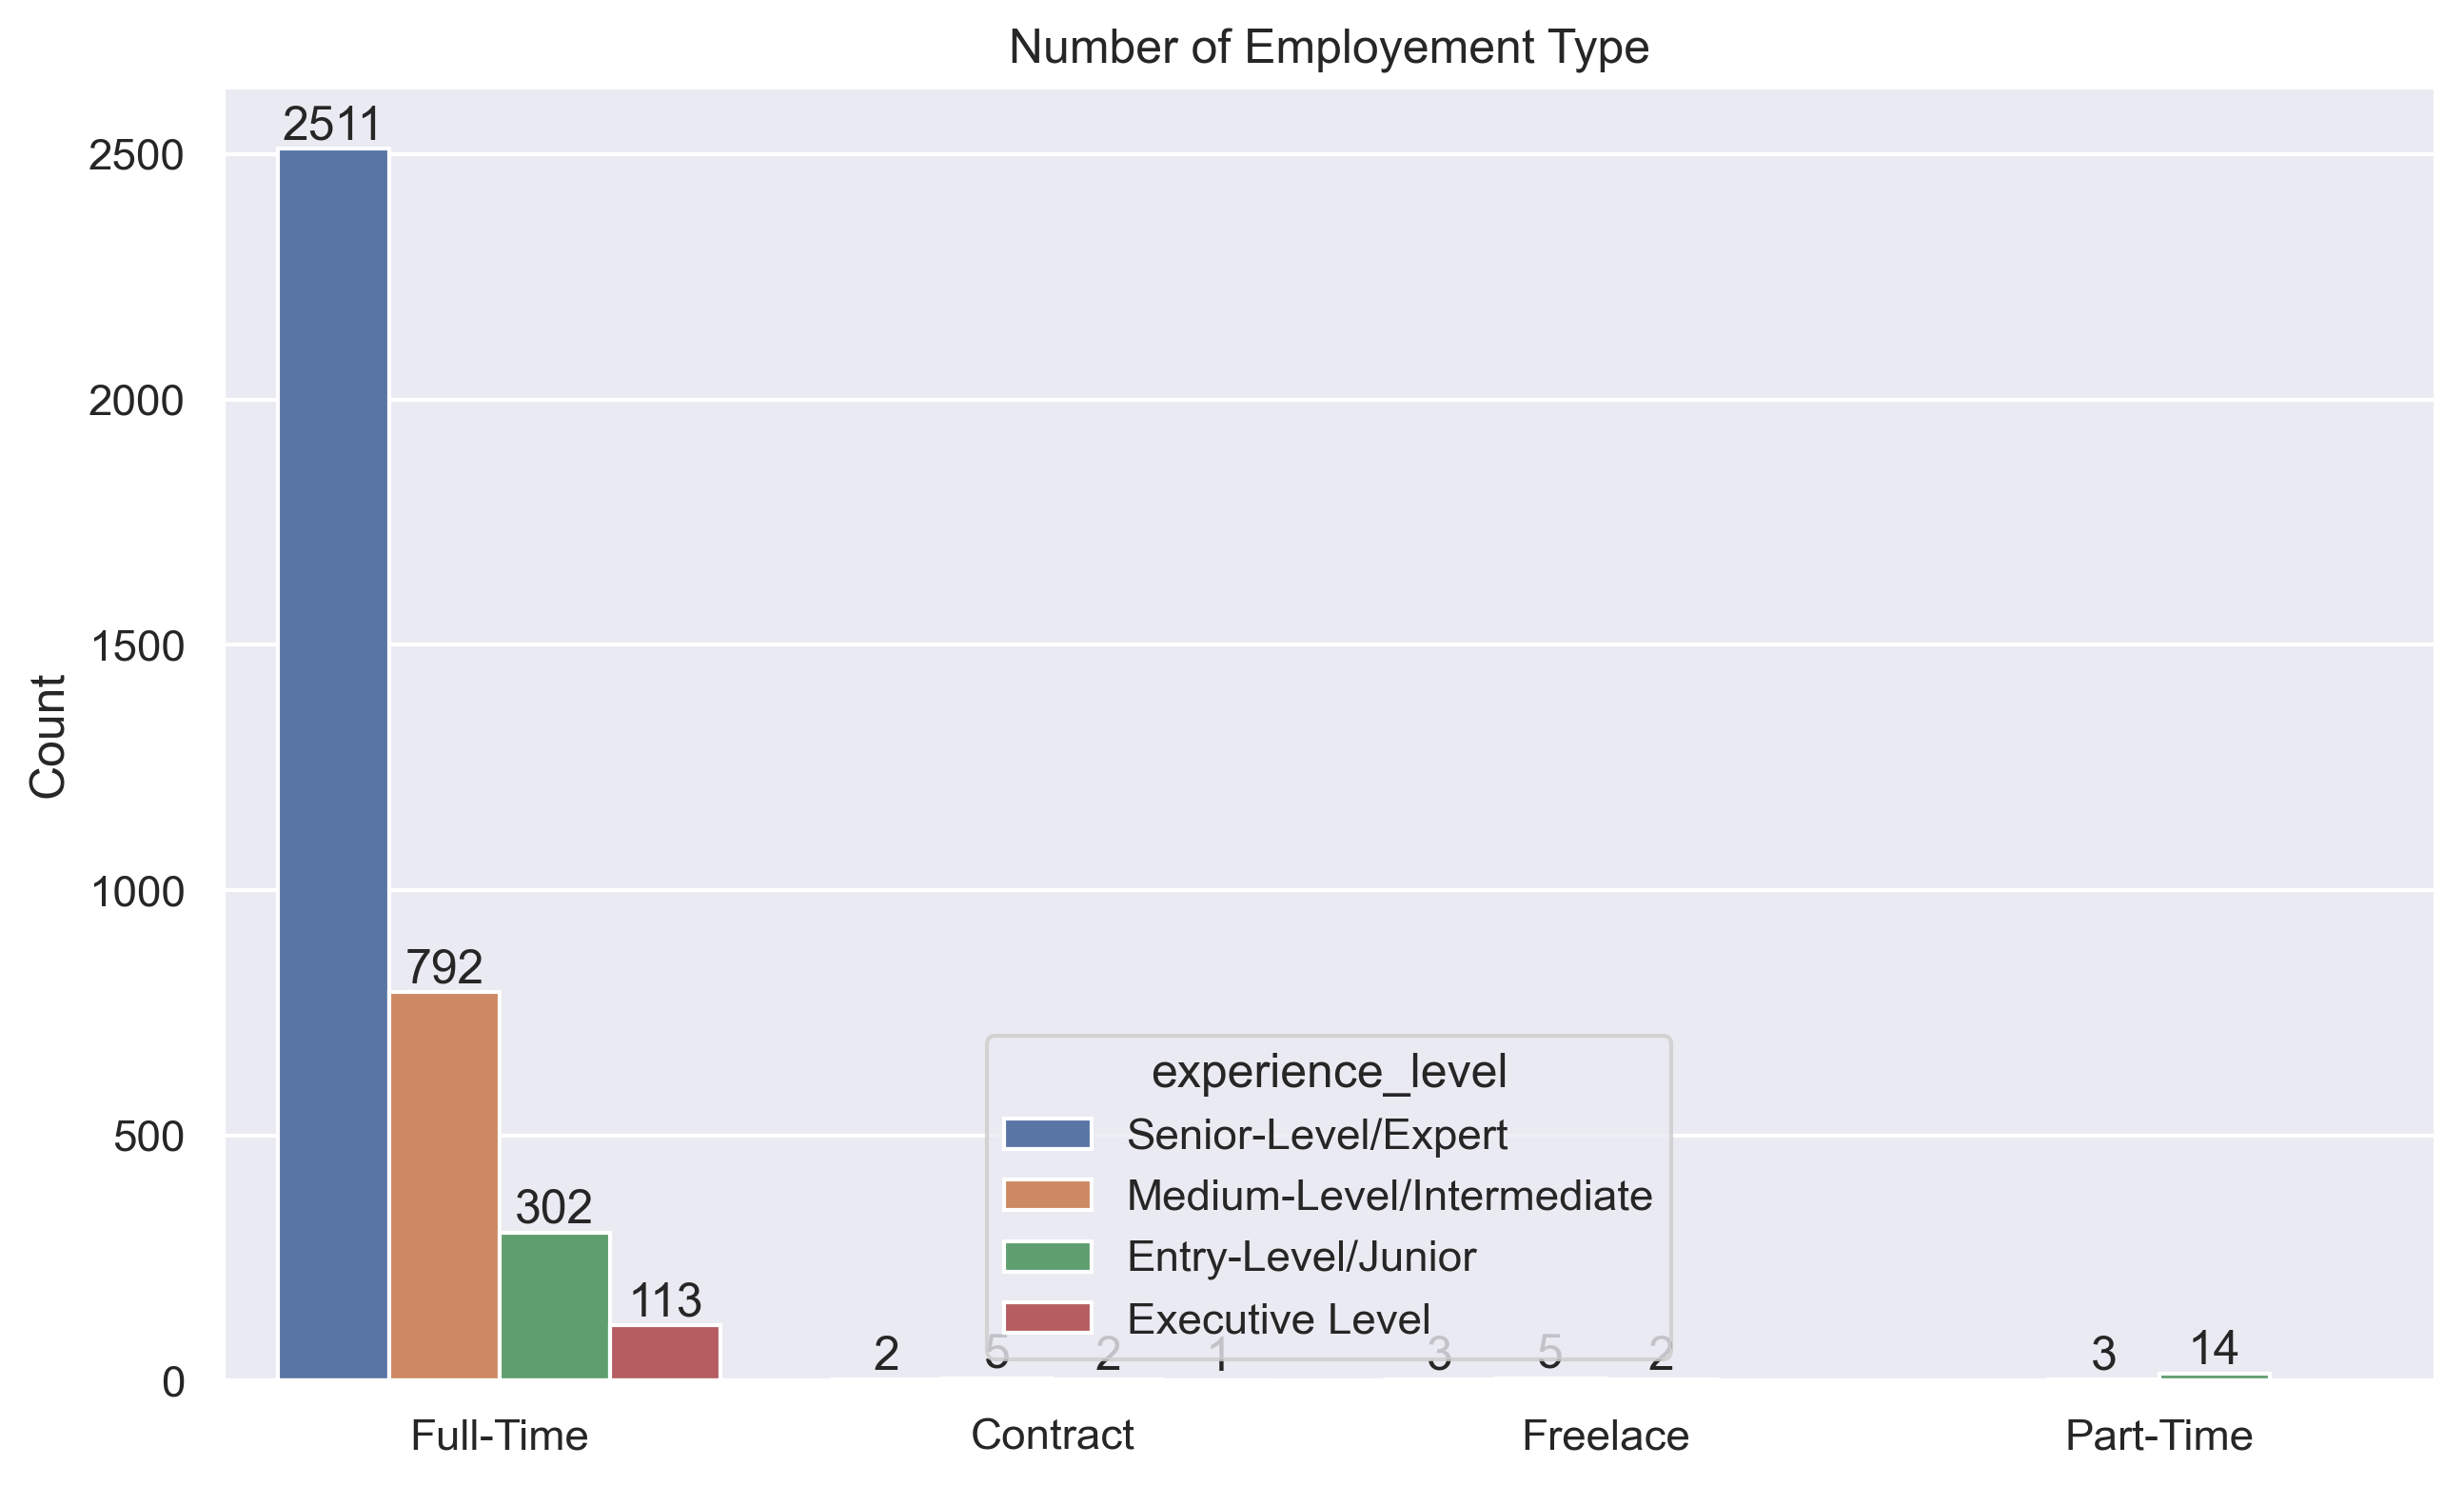

In [22]:
fig, ax = plt.subplots()
sns.countplot(ax=ax, data=data, x=data.employment_type, hue= 'experience_level')
ax.set(xlabel='', ylabel='Count', title='Number of Employement Type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])


As we can see, a considerable number of people are employed here on a full-time basis. Among the full-time employees, the majority of them are senior. We observe that freelancing is less prevalent these days

## Salaries by Job Title

[Text(2, 0, '375000'),
 Text(2, 0, '250000'),
 Text(2, 0, '212500'),
 Text(2, 0, '211254'),
 Text(2, 0, '198171'),
 Text(2, 0, '195141'),
 Text(2, 0, '192500'),
 Text(2, 0, '192420'),
 Text(2, 0, '191279'),
 Text(2, 0, '190264'),
 Text(2, 0, '190000'),
 Text(2, 0, '183858'),
 Text(2, 0, '175052'),
 Text(2, 0, '174150'),
 Text(2, 0, '163220')]

<Figure size 7500x2700 with 0 Axes>

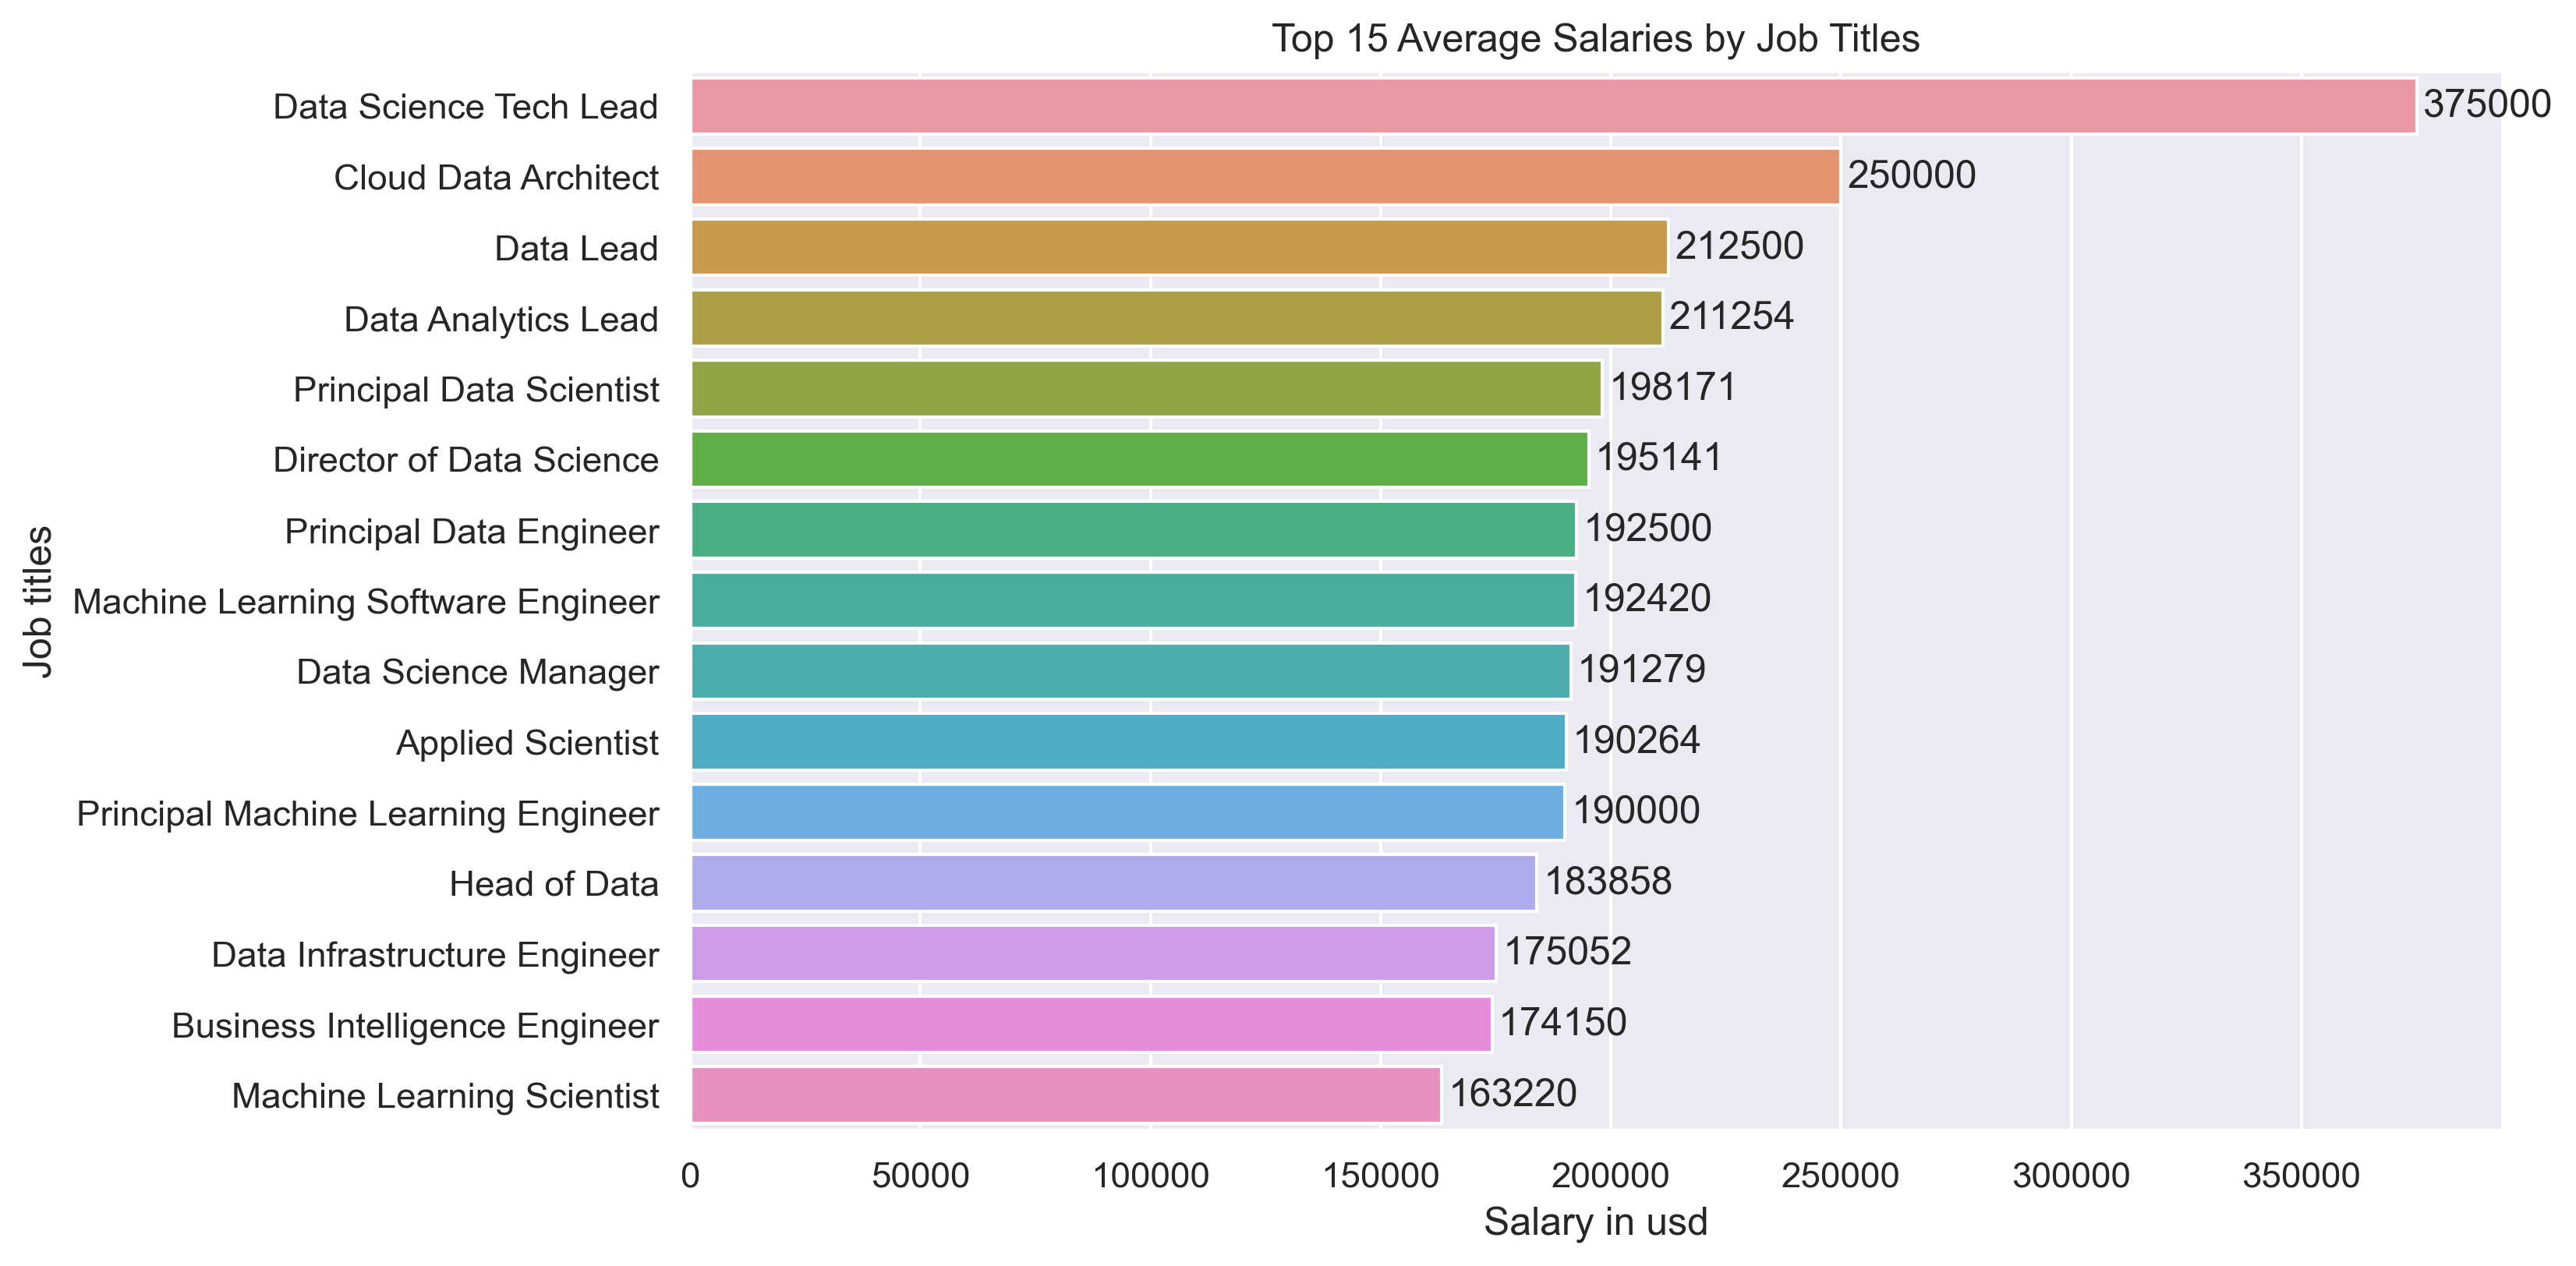

In [15]:
job_title_salary = data['salary_in_usd'].groupby(data['job_title']).mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles')
ax.bar_label(ax.containers[0], padding = 2)

## Salaries by Employement Type

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

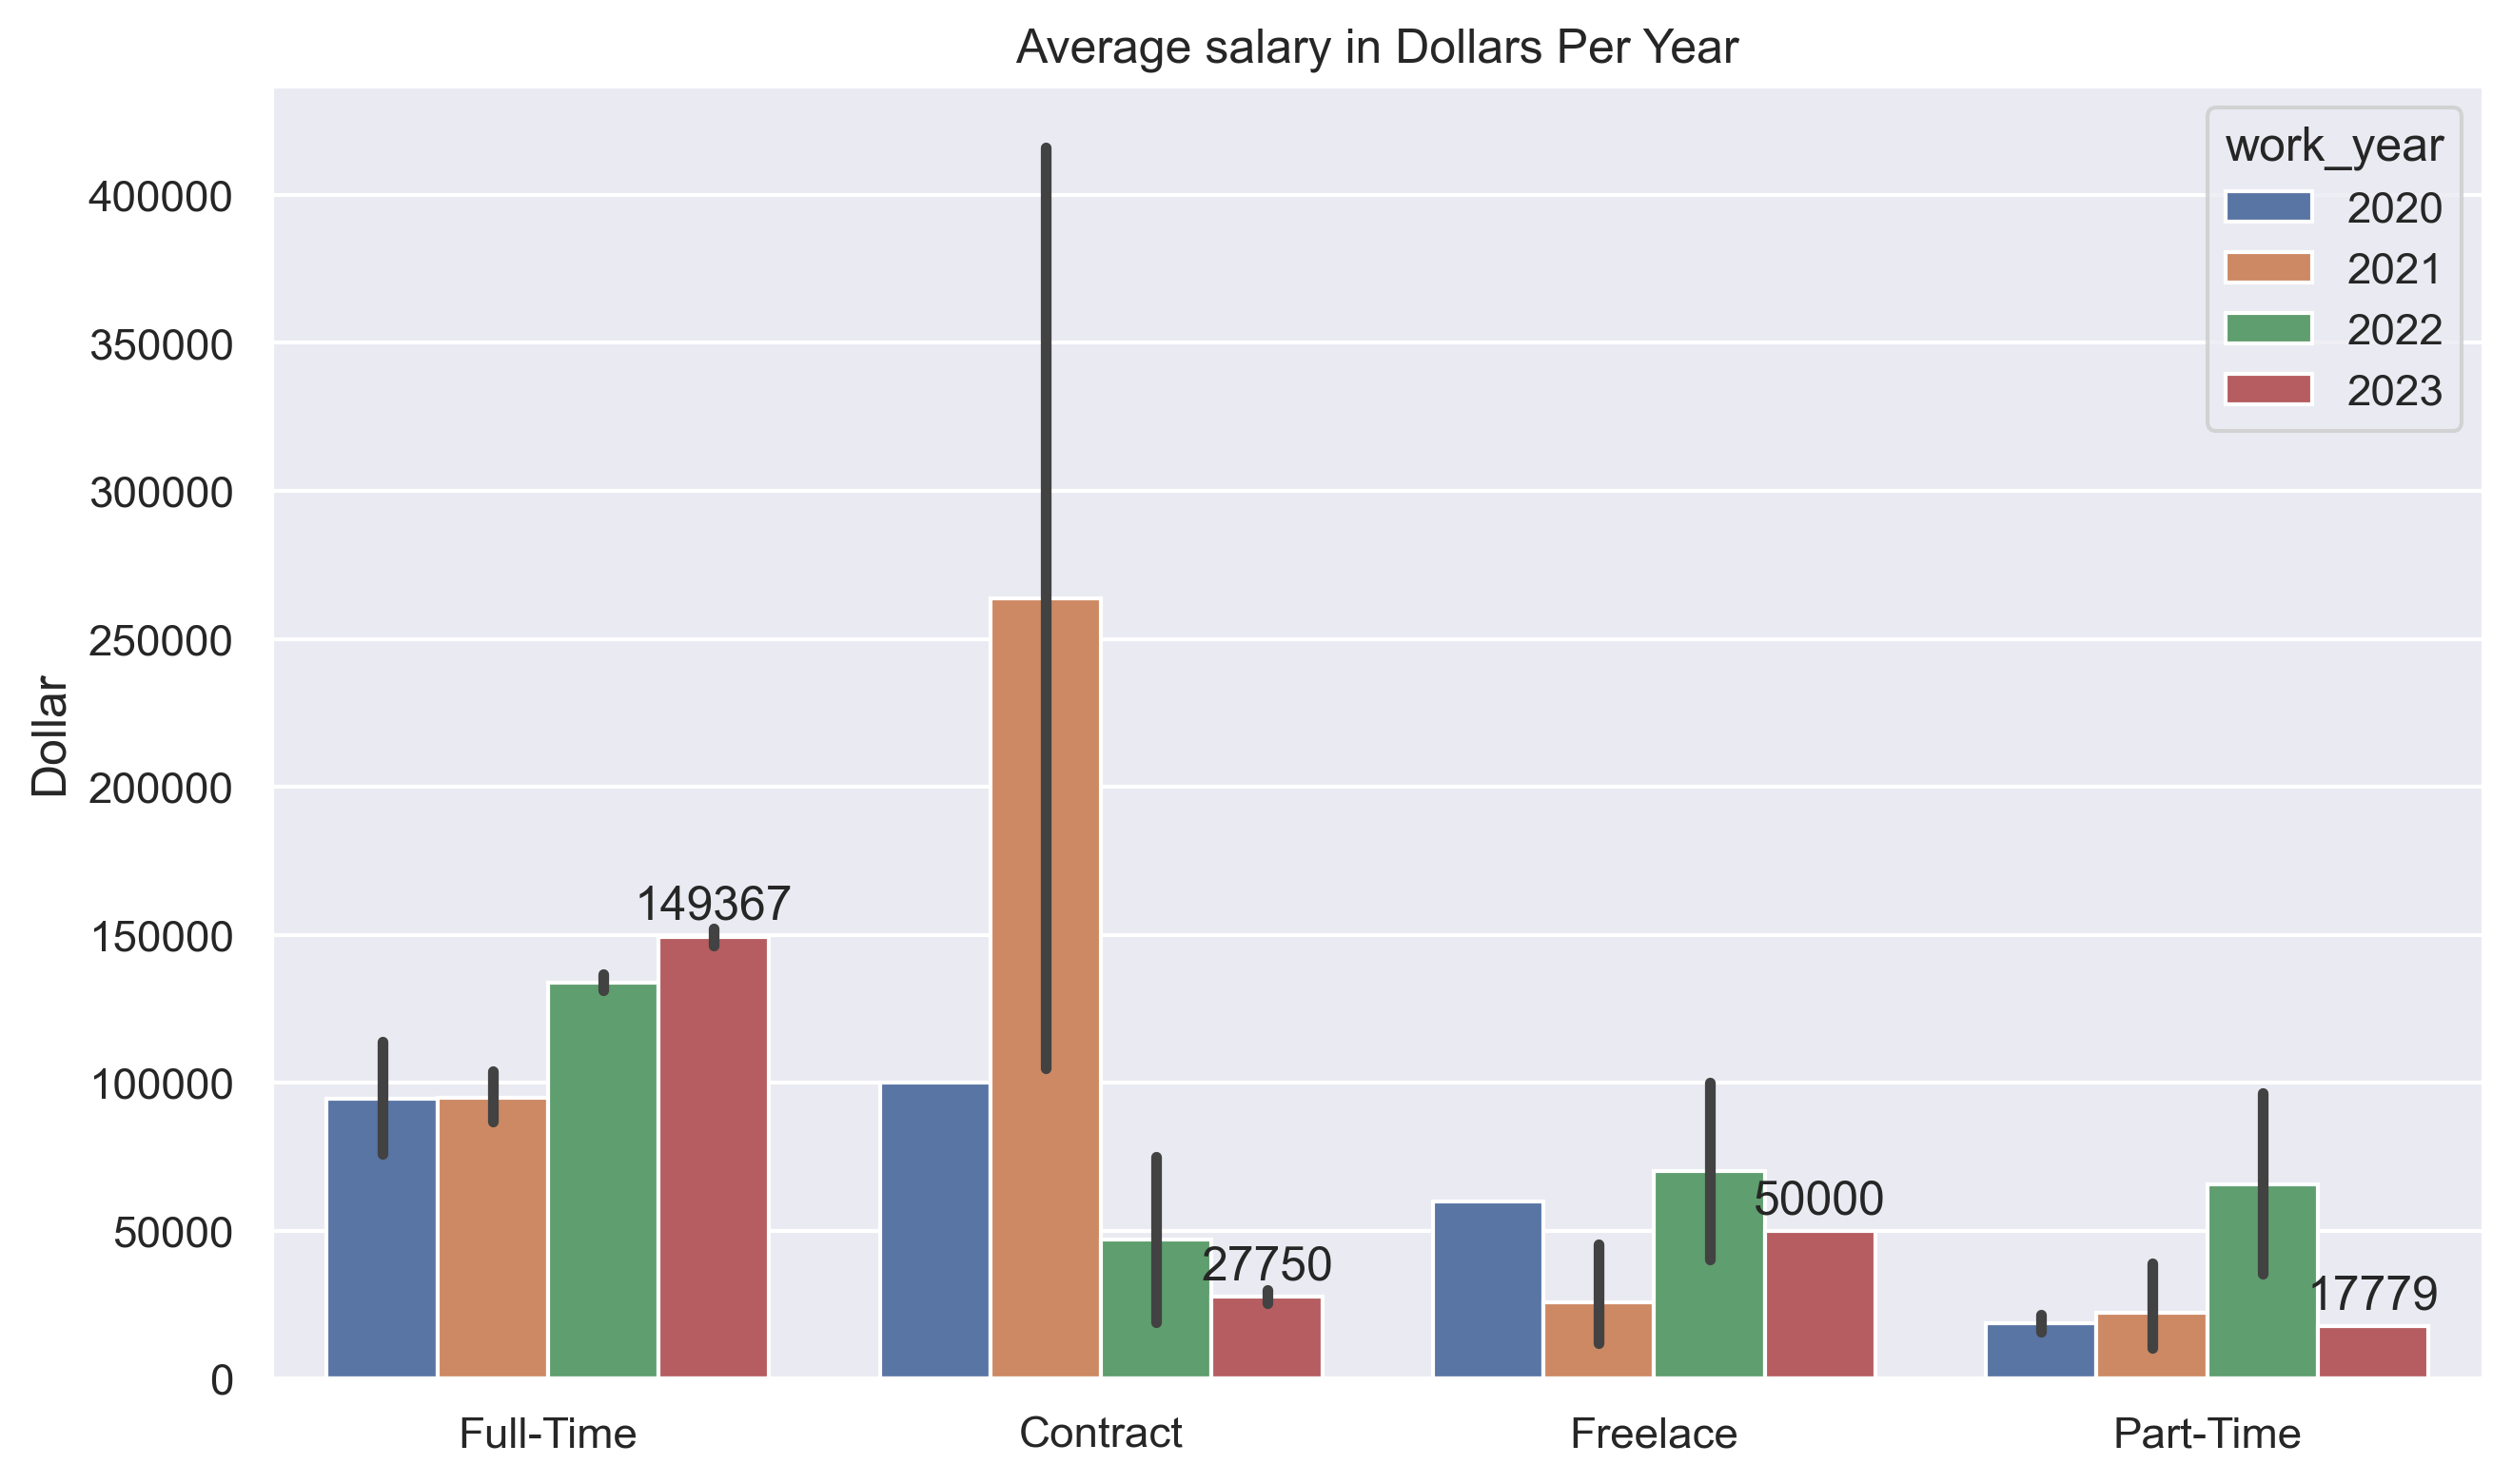

In [16]:
average_salaries = data.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending=False).reset_index()
fig, ax= plt.subplots()
sns.barplot(ax = ax , data=data, x = 'employment_type' , y = 'salary_in_usd' , hue = 'work_year')
ax.set(xlabel='', ylabel='Dollar', title='Average salary in Dollars Per Year')
ax.bar_label(ax.containers[3], padding =2)

## Salaries By Work Year

Text(0, 0.5, 'Salary')

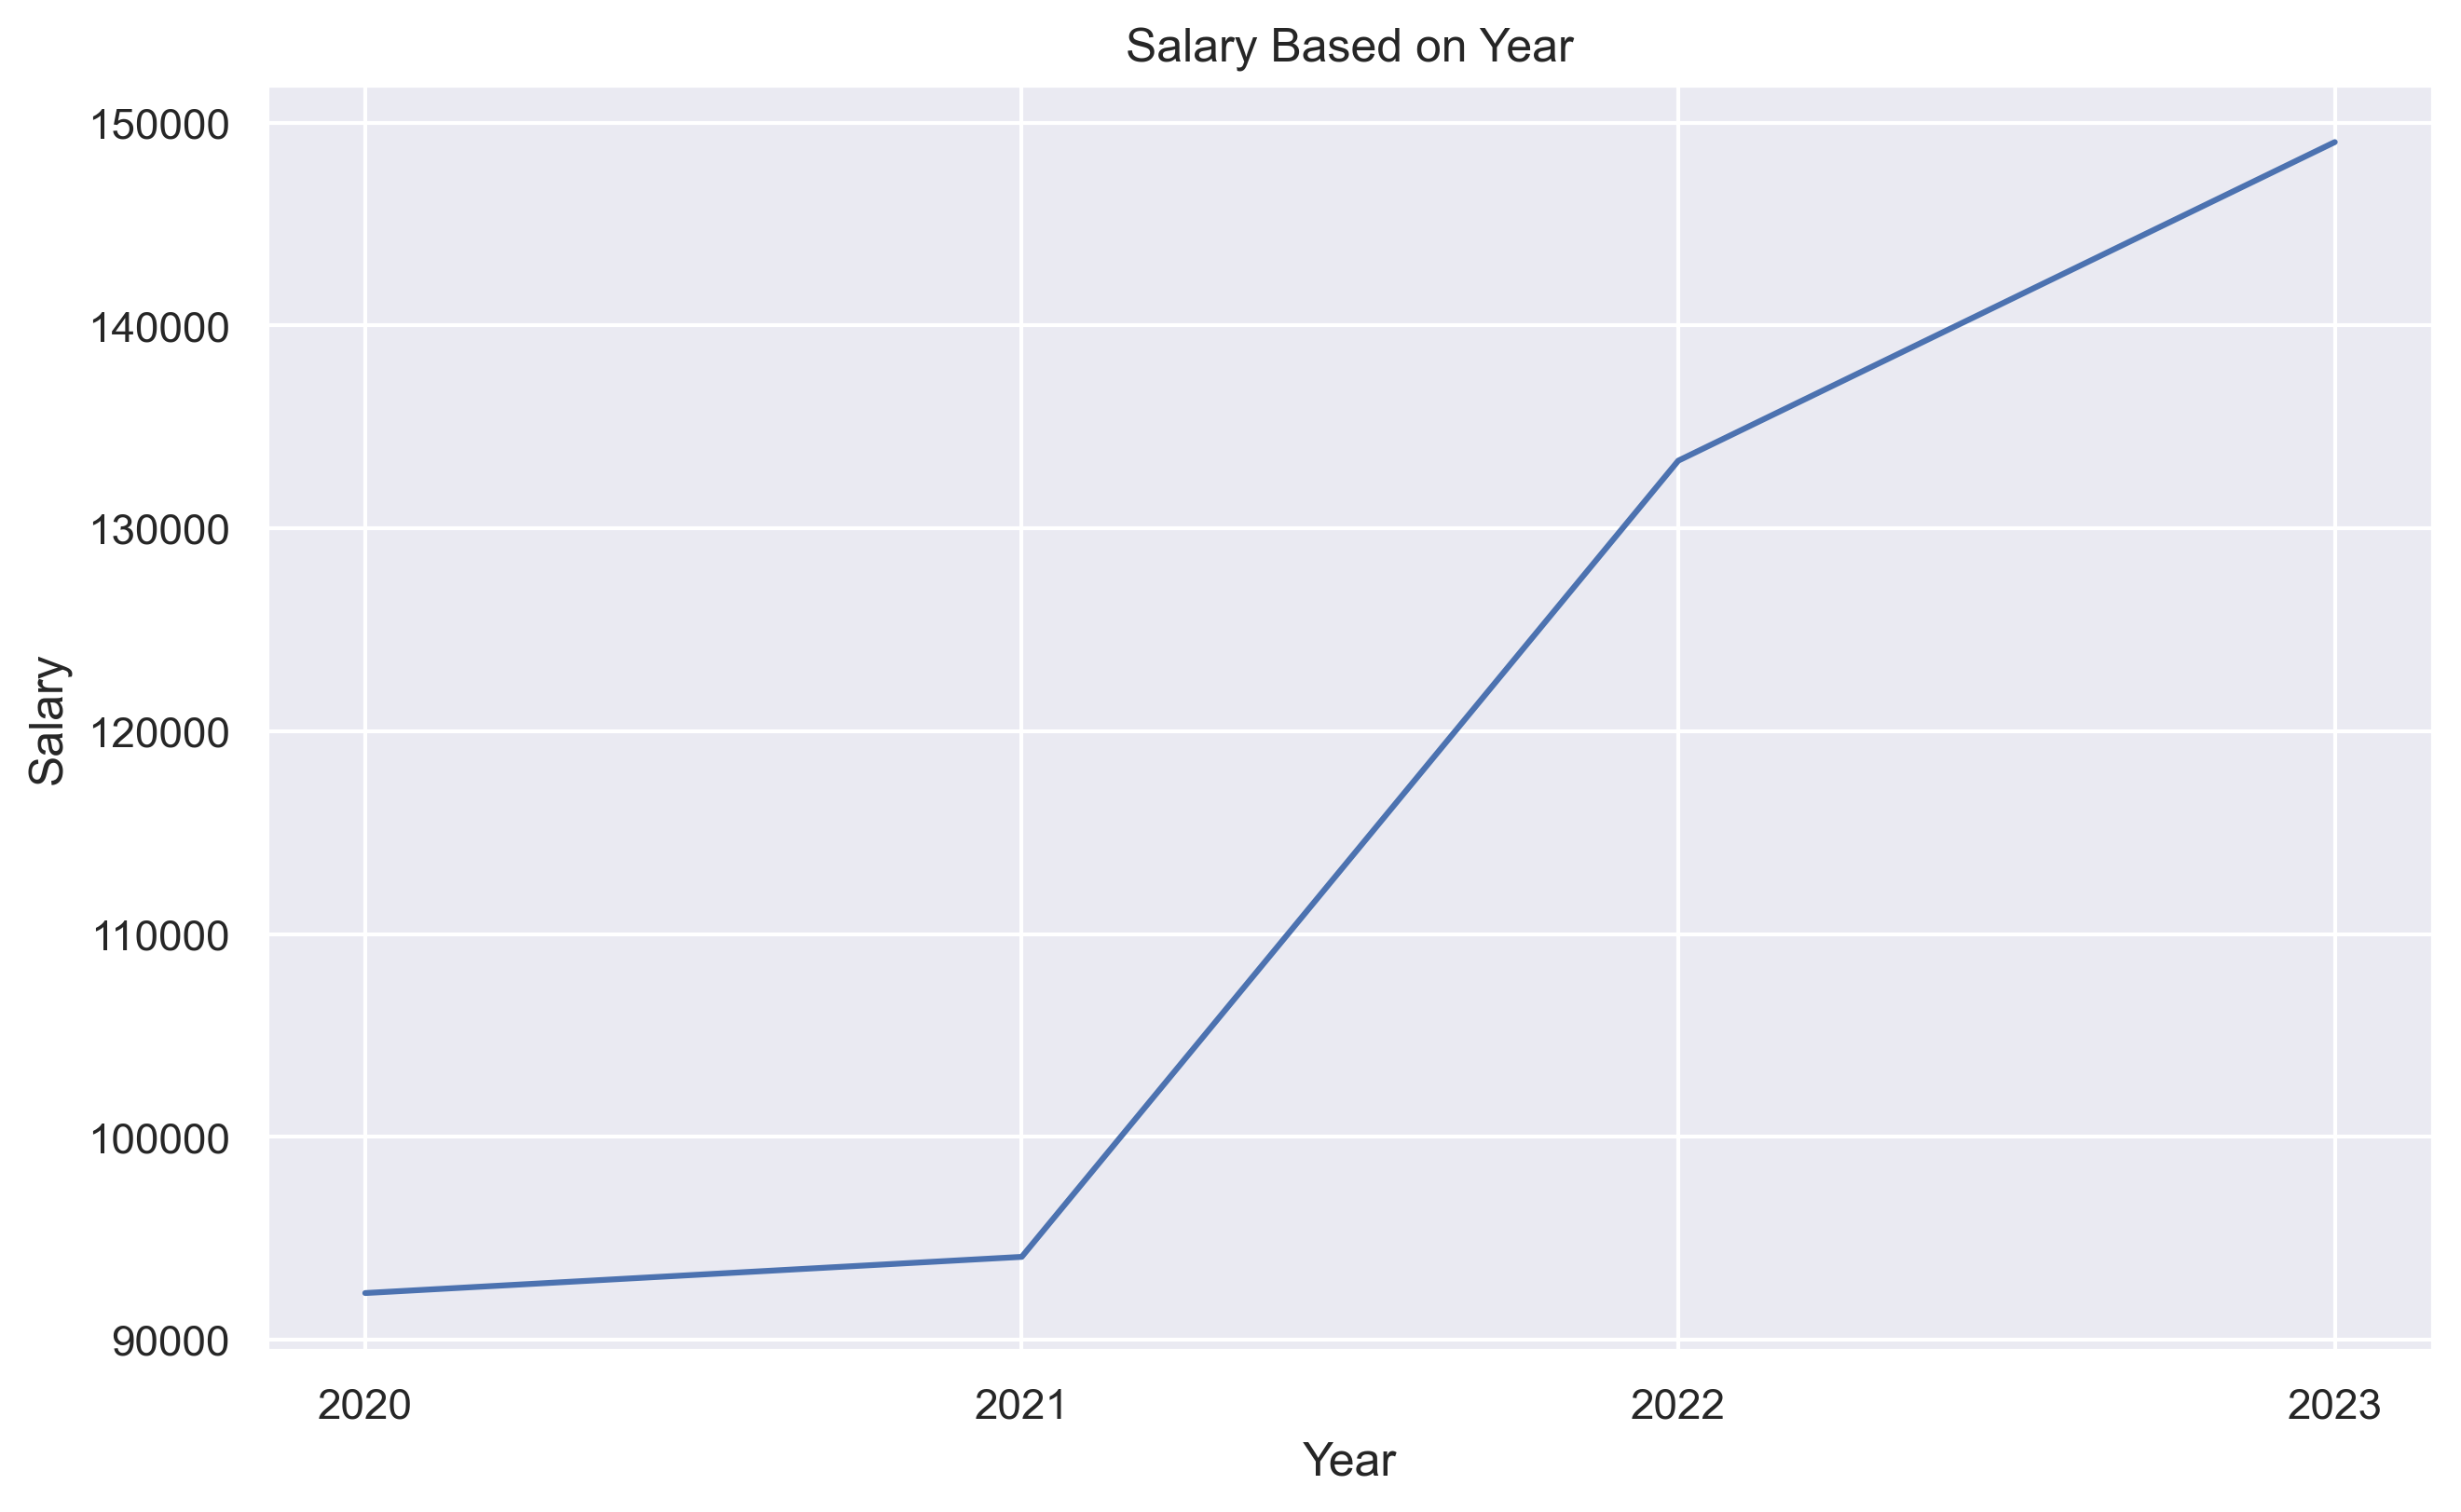

In [17]:
salaries_by_year = data['salary_in_usd'].groupby(data['work_year']).mean()
plt.title('Salary Based on Year')
sns.lineplot(x=['2020', '2021', '2022', '2023'], y=salaries_by_year)
plt.xlabel('Year')
plt.ylabel('Salary')

## Remote Jobs Location

In [18]:
remote_location = data.groupby('company_location')['remote_ratio'].mean().reset_index()
remote_location['company_location'] = coco.convert(names=remote_location['company_location'], to ='ISO3')
remote_location.head()

company_location  remote_ratio
0              ARE     66.666667
1              ALB     50.000000
2              ARM      0.000000
3              ARG    100.000000
4              ASM     66.666667

In [19]:


fig = px.choropleth(remote_location,
                    locations = remote_location.company_location, 
                    color = remote_location.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs Locations")
fig.show()

